In [1]:
# Import StringIO for reading and writing to in-memory text streams
from io import StringIO

# Import requests for making HTTP requests to web pages
import requests


import pandas as pd

# Import datetime and timedelta for working with dates and times
from  datetime import datetime , timedelta

# Import BeautifulSoup for parsing HTML and XML documents
import bs4

In [2]:
# Create a new requests session for making HTTP requests
session = requests.session()

# Define a dictionary of default headers for HTTP requests
headers = {
    "user-agent": "Chrome/87.0.4280.88"
}

# Define a dictionary of headers for Chrome browser simulation
head = {
    'user-agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/87.0.4280.88 Safari/537.36 "
}


In [81]:
#Function for scrapping historical data from www.nseindia.com

def getHistoryData(company, from_date=(datetime.today().strftime("%d-%m-%Y")), to_date=(datetime(datetime.today().year - 1, datetime.today().month,datetime.today().day).strftime("%d-%m-%Y"))):
    session.get("https://www.nseindia.com", headers=head)
    session.get("https://www.nseindia.com/get-quotes/equity?symbol=" + company, headers=head)  # to save cookies
    session.get("https://www.nseindia.com/api/historical/cm/equity?symbol="+company, headers=head)
    url = "https://www.nseindia.com/api/historical/cm/equity?symbol=" + company + "&series=[%22EQ%22]&from=" + from_date + "&to=" + to_date + "&csv=true"
    webdata = session.get(url=url, headers=head)
    df = pd.read_csv(StringIO(webdata.text[3:]))
    return df

In [82]:
# Retrieve historical data for WIPRO stock from 30-04-2023 to 30-04-2024
data1 = getHistoryData('WIPRO',from_date='30-04-2023',to_date='30-04-2024')
data1.to_csv('wipro_data.csv', index=False)

In [ ]:
len(data1) #Check length of dataset

In [56]:
data1.head() #Display the first 5 observation

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,30-Apr-2024,EQ,463.00,466.75,461.5,462.95,462.40,462.40,463.91,545.9,375.05,"44,51,478","2,06,50,64,238.45","72,568"
1,29-Apr-2024,EQ,467.65,468.00,461.6,464.60,463.30,462.95,463.59,545.9,375.05,"36,24,970","1,68,04,89,736.85","68,000"
2,26-Apr-2024,EQ,461.90,475.80,461.6,461.00,465.15,464.60,469.20,545.9,370.55,"1,07,39,147","5,03,88,08,647.80","1,69,644"
3,25-Apr-2024,EQ,458.90,462.55,455.8,459.90,461.65,461.00,460.46,545.9,370.55,"59,02,545","2,71,79,00,740.60","1,11,925"
4,24-Apr-2024,EQ,463.90,464.65,458.6,462.10,460.95,459.90,461.58,545.9,370.55,"29,57,584","1,36,51,54,814.05","58,214"


In [61]:
data1.info() #Display basic information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           249 non-null    object 
 1   series         249 non-null    object 
 2   OPEN           249 non-null    float64
 3   HIGH           249 non-null    float64
 4   LOW            249 non-null    float64
 5   PREV. CLOSE    249 non-null    float64
 6   ltp            249 non-null    float64
 7   close          249 non-null    float64
 8   vwap           249 non-null    float64
 9   52W H          249 non-null    float64
 10  52W L          249 non-null    float64
 11  VOLUME         249 non-null    object 
 12  VALUE          249 non-null    object 
 13  No of trades   249 non-null    object 
dtypes: float64(9), object(5)
memory usage: 27.4+ KB


In [70]:
data1.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')

In [71]:
data1.index

RangeIndex(start=0, stop=249, step=1)

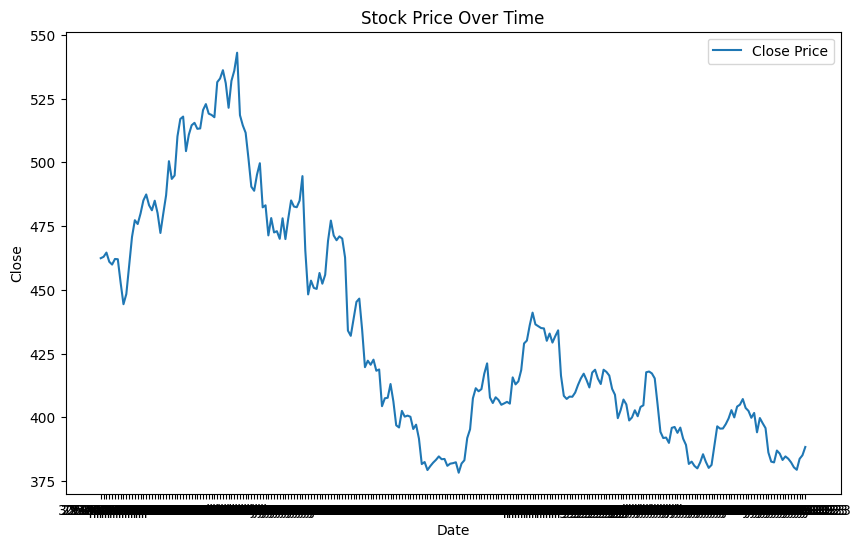

In [78]:
#Plot the data

plt.figure(figsize=(10, 6))
plt.plot(data1['Date '], data1['close '], label='Close Price')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()
		

In [83]:
# Save the plot to a file
plt.savefig('wipro_stock_price.png')

<Figure size 640x480 with 0 Axes>